In [130]:
import requests
import pandas as pd
import geopandas as gp
import keplergl

from matplotlib import pyplot as plt
import seaborn as sns

# Census Tracts

In [131]:
URL = 'https://api.census.gov/data/2018/acs/acs5'
QUERY = '?get=NAME,B02001_001E,B02001_002E,B02001_003E,B19301_001E&for=tract:*&in=state:37+county:021'
API_KEY = '&key=956d9dda37bee1b92b49676a4c84f6e011b15d73'

In [132]:
vals = requests.get(URL+QUERY+API_KEY).json()

In [133]:
tract_id = [v[5] + v[6] + v[7] for v in vals]
pop = [v[1] for v in vals]
white = [v[2] for v in vals]
black = [v[3] for v in vals]
income_per_capita = [v[4] for v in vals]

In [134]:
df = pd.DataFrame({'tract_id':tract_id,'pop':pop,'white':white,'black':black,'income_per_capita':income_per_capita}).drop(0).set_index('tract_id')

In [135]:
for c in df.columns:
    df[c] = df[c].astype(float)

In [136]:
df['pct_black'] = df['black']/df['pop']
df['pct_white'] = df['white']/df['pop']

In [137]:
df.sum()['black']

16095.0

In [138]:
df['pct_overall_black_population'] = df['black']/df.sum()['black']

In [139]:
pct_cols = [c for c in df.columns if 'pct' in c]

for c in pct_cols:
    df[c] = (df[c]*100).round(2)

In [140]:
df = df.reset_index()
df.sort_values(by='pct_black',ascending=False).head()

,tract_id,pop,white,black,income_per_capita,pct_black,pct_white,pct_overall_black_population
18,37021000900,3049.0,1453.0,1581.0,17257.0,51.85,47.65,9.82
10,37021000700,1394.0,833.0,489.0,32856.0,35.08,59.76,3.04
12,37021002000,6283.0,4266.0,1779.0,23279.0,28.31,67.90,11.05
20,37021000300,2215.0,1561.0,552.0,34150.0,24.92,70.47,3.43
0,37021000200,1505.0,1012.0,354.0,31936.0,23.52,67.24,2.20


In [141]:
df.dtypes

tract_id                         object
pop                             float64
white                           float64
black                           float64
income_per_capita               float64
pct_black                       float64
pct_white                       float64
pct_overall_black_population    float64
dtype: object

In [142]:
shape_path = './tl_2018_37_tract' 
gpdf = gp.read_file(shape_path)
gpdf = gpdf.loc[gpdf.COUNTYFP == '021']

In [143]:
buncombe = gpdf[['GEOID','geometry']].merge(df,left_on='GEOID',right_on='tract_id',how='inner').drop(columns='GEOID')

# Census Block Groups

In [144]:
URL = 'https://api.census.gov/data/2018/acs/acs5'
GEO = '&for=block group:*&in=state:37&in=county:021&in=tract:*'
VAR = '?get=NAME,B02001_001E,B02001_002E,B02001_003E,B19301_001E'
API_KEY = '&key=956d9dda37bee1b92b49676a4c84f6e011b15d73'

In [145]:
vals = requests.get(URL+VAR+GEO+API_KEY).json()

In [146]:
block_group_id = [v[5] + v[6] + v[7] + v[8] for v in vals]
pop = [v[1] for v in vals]
white = [v[2] for v in vals]
black = [v[3] for v in vals]
income_per_capita = [v[4] for v in vals]

In [147]:
df = pd.DataFrame({'block_group_id':block_group_id,'pop':pop,'white':white,'black':black,'income_per_capita':income_per_capita}).drop(0).set_index('block_group_id')

In [148]:
for c in df.columns:
    df[c] = df[c].astype(float)

In [149]:
df['pct_black'] = df['black']/df['pop']
df['pct_white'] = df['white']/df['pop']

In [150]:
df.head()

,pop,white,black,income_per_capita,pct_black,pct_white
block_group_id,,,,,,
370210001001,1499.0,1120.0,233.0,33325.0,0.155437,0.747165
370210003001,1426.0,933.0,426.0,28473.0,0.298738,0.654278
370210003002,789.0,628.0,126.0,44409.0,0.159696,0.795944
370210008002,1425.0,1196.0,176.0,43323.0,0.123509,0.839298
370210008003,1158.0,1125.0,25.0,46686.0,0.021589,0.971503


In [151]:
df['pct_overall_black_population'] = df['black']/df.sum()['black']

In [152]:
pct_cols = [c for c in df.columns if 'pct' in c]

for c in pct_cols:
    df[c] = (df[c]*100).round(2)

In [153]:
df = df.reset_index()
df.sort_values(by='pct_black',ascending=False).head()

,block_group_id,pop,white,black,income_per_capita,pct_black,pct_white,pct_overall_black_population
131,370210020004,1944.0,646.0,1155.0,22959.0,59.41,33.23,7.18
8,370210009001,606.0,262.0,344.0,24573.0,56.77,43.23,2.14
6,370210009003,1653.0,751.0,889.0,13783.0,53.78,45.43,5.52
37,370210020003,594.0,288.0,303.0,12155.0,51.01,48.48,1.88
7,370210009002,790.0,440.0,348.0,18914.0,44.05,55.70,2.16


In [154]:
shape_path = './tl_2018_37_bg' 
gpdf = gp.read_file(shape_path)
gpdf = gpdf.loc[gpdf.COUNTYFP == '021']

In [155]:
buncombebg = gpdf[['GEOID','geometry']].merge(df,left_on='GEOID',right_on='block_group_id',how='inner').drop(columns='GEOID')

In [156]:
buncombebg.head()

,geometry,block_group_id,pop,white,black,income_per_capita,pct_black,pct_white,pct_overall_black_population
0,"POLYGON ((-82.58716099999999 35.566692, -82.58...",370210010002,1800.0,1255.0,468.0,21093.0,26.00,69.72,2.91
1,"POLYGON ((-82.57599599999999 35.570083, -82.57...",370210010003,804.0,732.0,10.0,37212.0,1.24,91.04,0.06
2,"POLYGON ((-82.59466999999999 35.582885, -82.59...",370210011001,1243.0,857.0,204.0,32628.0,16.41,68.95,1.27
3,"POLYGON ((-82.609472 35.58552, -82.609268 35.5...",370210012001,1027.0,980.0,47.0,38630.0,4.58,95.42,0.29
4,"POLYGON ((-82.614216 35.575337, -82.6137019999...",370210012002,722.0,617.0,27.0,35699.0,3.74,85.46,0.17


In [157]:
m = keplergl.KeplerGl()
m.add_data(data=buncombe,name='ACS - 5 Year 2018 - Census Tracts')
m.add_data(data=buncombebg,name='ACS - 5 Year 2018 - Block Groups')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [158]:
m

KeplerGl(data={'ACS - 5 Year 2018 - Census Tracts': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [165]:
m.save_to_html(file_name="buncombe.html")

Map saved to buncombe.html!


In [166]:
buncombe.describe()

,pop,white,black,income_per_capita,pct_black,pct_white,pct_overall_black_population
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,4544.178571,4035.375000,287.410714,32504.357143,7.080179,88.066786,1.785714
std,1917.525395,1780.364616,355.792983,13765.962183,9.816580,10.170429,2.209832
min,1177.000000,833.000000,0.000000,15710.000000,0.000000,47.650000,0.000000
25%,3516.000000,3212.750000,48.750000,25421.250000,1.285000,84.642500,0.302500
50%,4407.000000,3951.000000,168.000000,30350.000000,3.785000,90.570000,1.045000
75%,5607.000000,5037.250000,379.250000,35846.000000,7.862500,94.940000,2.355000
max,9219.000000,8553.000000,1779.000000,112783.000000,51.850000,99.300000,11.050000


In [167]:
buncombebg.describe()

,pop,white,black,income_per_capita,pct_black,pct_white,pct_overall_black_population
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1652.428571,1467.409091,104.512987,31309.149351,6.833961,88.520455,0.649481
std,765.445719,704.296382,175.542306,13400.713476,11.573838,12.193456,1.090715
min,425.000000,262.000000,0.000000,12155.000000,0.000000,33.230000,0.000000
25%,1095.500000,965.750000,0.000000,22994.250000,0.000000,85.682500,0.000000
50%,1516.000000,1384.000000,43.500000,28442.500000,2.250000,91.680000,0.270000
75%,2090.750000,1862.750000,125.500000,35157.000000,7.422500,96.560000,0.777500
max,4319.000000,3788.000000,1155.000000,112783.000000,59.410000,100.000000,7.180000


In [104]:
buncombe.sort_values(by='pct_black',ascending=False)[['tract_id','pop','pct_black','income_per_capita','pct_overall_black_population']].head(25).set_index('tract_id')

,pop,pct_black,income_per_capita,pct_overall_black_population
tract_id,,,,
37021000900,3049.0,0.518531,17257.0,0.098229
37021000700,1394.0,0.350789,32856.0,0.030382
37021002000,6283.0,0.283145,23279.0,0.110531
37021000300,2215.0,0.249210,34150.0,0.034296
37021000200,1505.0,0.235216,31936.0,0.021994
37021002102,5533.0,0.185975,27698.0,0.063933
37021000800,3623.0,0.178581,40547.0,0.040199
37021000100,1499.0,0.155437,33325.0,0.014477
37021001000,4622.0,0.124405,26040.0,0.035725


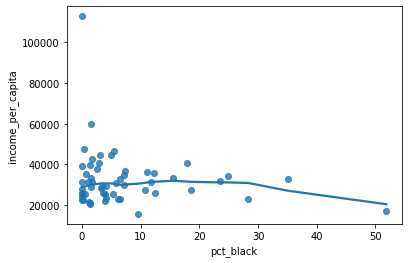

In [159]:
sns.regplot(x=buncombe.pct_black,y=buncombe.income_per_capita,lowess=True)
plt.show()

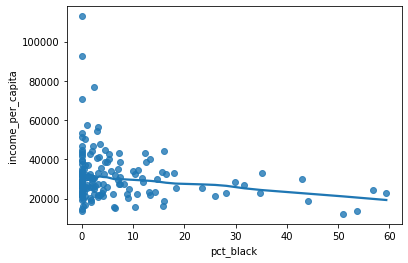

In [160]:
sns.regplot(x=buncombebg.pct_black,y=buncombebg.income_per_capita,lowess=True)
plt.show()

In [96]:
buncombe.corr()['pct_black']

pop                            -0.185618
white                          -0.347856
black                           0.826541
income_per_capita              -0.166170
pct_black                       1.000000
pct_white                      -0.949031
pct_overall_black_population    0.826541
Name: pct_black, dtype: float64

In [161]:
buncombebg.corr()['pct_black']

pop                            -0.095605
white                          -0.308603
black                           0.851981
income_per_capita              -0.214929
pct_black                       1.000000
pct_white                      -0.933872
pct_overall_black_population    0.851973
Name: pct_black, dtype: float64